In [1]:
import torch
import torch.nn as nn

In [2]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()

# Active Functions

### Sigmoid
$f(x)= \frac{1}{1+e^{-x}}$

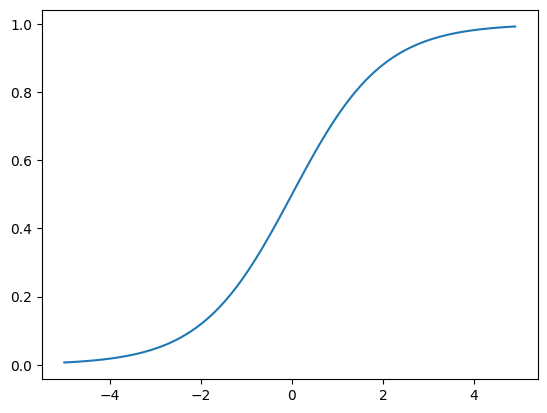

In [4]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh
$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

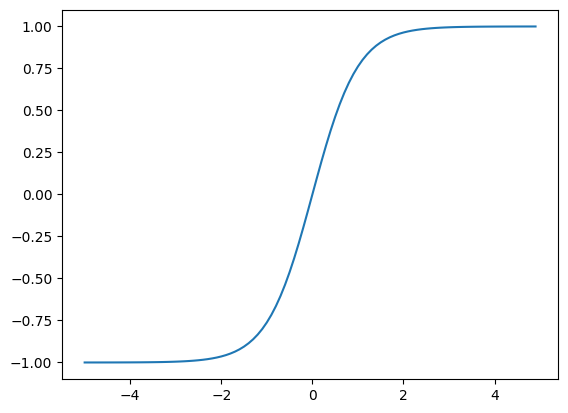

In [5]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5, 5, 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU
$f(x)=max(0, x)$

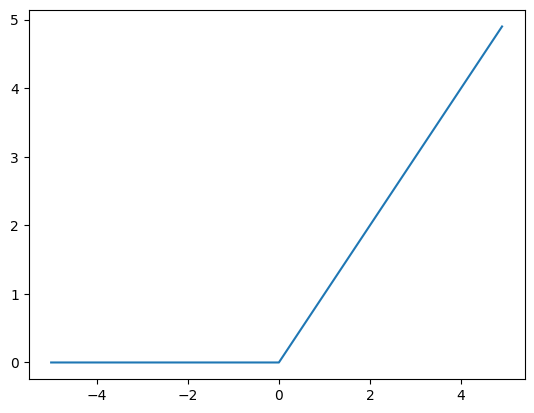

In [6]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5, 5, 0.1)
y = torch.relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### SoftMax

## $softmax(x_i) = \frac{e^{x_i}}{\displaystyle\sum_{j=1}^{k}e^{x_j}}$

In [7]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.2392, -0.7537,  1.1804]])
tensor([[0.2542, 0.0942, 0.6516]])
tensor([1.])


# LOSS Functions

### Mean Squared Error(MSE)
## $L_{MSE}(y, \hat{y})= \frac{1}{n}\displaystyle\sum_{{i=1}}^{n}(y-\hat{y})^2$

In [9]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.1476, grad_fn=<MseLossBackward0>)


### Cross Entropy
## $L_{cross\_entropy(y, \hat{y})}=-\displaystyle\sum_{i}y_ilog(\hat{y}_i)$

one disadvantage of cross entropy is its stability. When x < 0 it may be too small. On the other side when x > 0, it may be too bigger.

In [10]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(1.2787, grad_fn=<NllLossBackward0>)


In [11]:
# Binary Cross Entropy

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.4329],
        [0.5910],
        [0.3888],
        [0.9070]], grad_fn=<SigmoidBackward0>)
tensor(1.2628, grad_fn=<BinaryCrossEntropyBackward0>)


In [12]:
# Optimizer Algorithm

import torch.optim as optim

input_dim = 2
lr = 0.001
perception = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perception.parameters(), lr=lr)